In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Read in Data

In [2]:
# read in data
file_path = '/net/big-tank/POOL/users/lkardum/new_mc_binning.csv'
df_raw = pd.read_csv(file_path)
df_raw

,Unnamed: 0,more_features.Type,more_features.Label_clf,more_features.confidence_1,more_features.Label_cut,more_features.cut_selected,SplineMPE.zenith,SplineMPE.azimuth,SplineMPEFitParams.nmini,SPEFit2TimeSplit1FitParams.logl,...,weight_honda_h4a,weight_astro_aachen,weight_honda_h3a,weight_full_aachen,weight_conv_mceq,weight_BERSS_h3a,weight_astro_hese6,weight_conv_mceq_epos,wieght_astro_hans,weight_conv_mceq_sibyll
0,0,2.0,1.0,1.000000,1.0,1.0,2.173209,1.450835,125.0,123.124257,...,1.362744e-10,3.356666e-13,1.329781e-10,1.466115e-10,1.513629e-10,4.255498e-13,1.326973e-11,1.665132e-10,1.978085e-12,1.514189e-10
1,2,2.0,1.0,1.000000,1.0,1.0,2.090220,2.636622,200.0,237.086697,...,2.616773e-10,1.818387e-14,2.555329e-10,2.811043e-10,2.604896e-10,5.291204e-14,6.075675e-12,2.589331e-10,2.827261e-13,2.599255e-10
2,3,2.0,1.0,1.000000,1.0,1.0,2.152436,6.229766,206.0,38.646277,...,1.275845e-10,6.482892e-14,1.245345e-10,1.370527e-10,1.340323e-10,1.262899e-13,6.840558e-12,1.470665e-10,5.969110e-13,1.344844e-10
3,4,2.0,1.0,0.994036,1.0,1.0,1.526620,3.151964,229.0,63.513442,...,1.641275e-10,1.208935e-14,1.602519e-10,1.762892e-10,1.731086e-10,3.214053e-14,2.962452e-12,1.829784e-10,1.632577e-13,1.720191e-10
4,5,4.0,2.0,0.976143,1.0,1.0,2.918809,4.037246,256.0,56.986199,...,7.372845e-11,1.381177e-13,7.195353e-11,7.928700e-11,8.272719e-11,2.100918e-13,8.138297e-12,9.102268e-11,9.758263e-13,7.895426e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336408,18987279,2.0,1.0,1.000000,1.0,1.0,2.172118,6.277671,219.0,49.769049,...,1.351133e-10,2.830882e-13,1.318486e-10,1.453165e-10,1.491919e-10,3.775408e-13,1.247517e-11,1.638706e-10,1.752669e-12,1.490328e-10
13336409,18987280,2.0,1.0,1.000000,1.0,1.0,1.793314,0.869684,279.0,218.336336,...,5.564235e-10,2.367969e-13,5.430380e-10,5.975786e-10,5.816988e-10,3.701852e-13,1.484627e-11,5.729662e-10,1.720888e-12,5.622095e-10
13336410,18987282,2.0,1.0,0.996024,1.0,1.0,2.338623,5.743147,314.0,73.113221,...,1.006707e-10,3.856570e-14,9.827385e-11,1.081398e-10,1.041390e-10,8.479596e-14,5.525887e-12,1.142348e-10,4.080761e-13,1.040911e-10
13336411,18987283,2.0,1.0,0.994036,1.0,1.0,2.297157,0.333139,214.0,84.905412,...,9.357208e-11,1.131404e-14,9.137286e-11,1.005215e-10,9.438675e-11,3.249545e-14,3.601112e-12,1.016194e-10,1.720724e-13,9.456591e-11


In [3]:
# drop critical rows
df = df_raw.drop([ 1007671,  1426233,  2304853,  2715790,  3674355,  3741687, 4178063,  4969266,  5038333,  5334552,  5589516,  5863719,
 5978972,  7006367,  7281704,  7509650,  8380383,  8758113,9043798, 10280382, 11179530, 11184928, 11332586, 11797767,12253944], axis = 0)

# substitute NaNs with extreme Value
df.fillna(value =-100000, inplace = True)

# Select possible features (no MC data)

In [4]:
# problems with feature: SplineMPECramerRaoParams.variance_y
# ERROR: "Input contains NaN, infinity or a value too large for dtype('float32')"

df['SplineMPECramerRaoParams.variance_y'].describe()

count     1.333639e+07
mean               inf
std                NaN
min     -1.930218e+230
25%       1.583103e+01
50%       4.759939e+01
75%       1.916019e+02
max                inf
Name: SplineMPECramerRaoParams.variance_y, dtype: float64

In [5]:
# just drop the feature
df.drop(columns='SplineMPECramerRaoParams.variance_y', inplace=True)

In [6]:
feature_list = [
#    'more_features.Type',
#    'more_features.Label_clf',
#    'more_features.confidence_1',
#    'more_features.Label_cut',
#    'more_features.cut_selected',
    'SplineMPE.zenith',
    'SplineMPE.azimuth',
    'SplineMPEFitParams.nmini',
    'SPEFit2TimeSplit1FitParams.logl',
    'I3MCWeightDict.InteractionType',
    'I3MCWeightDict.NEvents',
    'I3MCWeightDict.OneWeight',
    'I3MCWeightDict.PowerLawIndex',
    'I3MCWeightDict.TotalInteractionProbabilityWeight',
    'SplineMPECramerRaoParams.variance_theta',
#    'SplineMPECramerRaoParams.variance_y',
    'SplineMPECramerRaoParams.covariance_theta_phi',
    'SplineMPECramerRaoParams.covariance_theta_y',
    'SplineMPETruncatedEnergy_SPICEMie_DOMS_Neutrino.energy',
    'SPEFit2BayesianFitParams.nmini',
    'MuEXAngular4_rllt.value',
    'SplineMPEMuEXDifferential.energy',
#    'MCPrimary.zenith',
#    'MCPrimary.azimuth',
#    'MCPrimary.energy',
#    'MCPrimary.type',
    'SPEFit2GeoSplit2BayesianFitParams.logl',
    'SplineMPEDirectHitsICC.dir_track_hit_distribution_smoothness',
    'HitStatisticsValuesIC.q_max_doms',
    'HitStatisticsValuesIC.q_tot_pulses',
    'SPEFit2GeoSplit2FitParams.nmini',
    'HitMultiplicityValuesIC.n_hit_doms_one_pulse',
    'BestTrackDirectHitsICA.dir_track_hit_distribution_smoothness',
    'SplineMPETruncatedEnergy_SPICEMie_BINS_MuEres.value',
    'MPEFitParaboloidFitParams.err1',
    'MPEFitParaboloidFitParams.err2',
    'MPEFitParaboloidFitParams.rotang',
    'SplineMPEDirectHitsICA.dir_track_hit_distribution_smoothness',
    'SplineMPEDirectHitsICA.n_dir_pulses',
    'SPEFit2TimeSplit2BayesianFitParams.nmini',
    'SPEFit2GeoSplit1FitParams.nmini',
    'SplineMPEDirectHitsICD.n_dir_strings',
    'SplineMPE_SegementFitParams.rlogl',
    'SplineMPETruncatedEnergy_SPICEMie_BINS_Neutrino.energy',
    'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
    'MPEFitHighNoiseFitParams.nmini',
    'LineFitGeoSplit1Params.n_hits',
    'SplineMPEDirectHitsICB.n_early_strings',
    'SplineMPEDirectHitsICB.n_late_doms',
    'SPEFitSingleTimeSplit1.azimuth',
    'ProjectedQ.max_grad_radius_circ_F',
    'ProjectedQ.ratio',
    'BestTrackCramerRaoParams.cramer_rao_theta',
    'BestTrackCramerRaoParams.variance_theta',
    'BestTrackCramerRaoParams.variance_x',
    'BestTrackCramerRaoParams.variance_y',
    'BestTrackCramerRaoParams.covariance_theta_phi',
    'BestTrackCramerRaoParams.covariance_theta_y',
    'SplineMPETruncatedEnergy_SPICEMie_DOMS_Muon.energy',
    'SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.energy',
    'SPEFit2TimeSplit1BayesianFitParams.nmini',
    'LineFitTimeSplit2Params.n_hits',
    'BestTrackDirectHitsICB.n_dir_pulses',
    'HitStatisticsValues.min_pulse_time',
    'SplineMPEDirectHitsICE.n_dir_doms',
    'SplineMPEDirectHitsICE.n_late_strings',
    'MPEFit_HVFitParams.nmini',
    'LineFitTimeSplit2.speed',
    'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Neutrino.energy',
    'SPEFitSingle_TWHVFitParams.rlogl',
    'Borderness.Q_ratio_in_border',
    'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value',
    'SPEFit2GeoSplit1BayesianFitParams.logl',
    'SPEFit2GeoSplit1BayesianFitParams.nmini',
    'SPEFit2Bayesian.x',
    'BestTrackDirectHitsICC.n_early_strings',
    'SplineMPE_MillipedeHighEnergyMIEFitParams.rlogl',
    'SplineMPEDirectHitsD.dir_track_length',
    'SPEFit2_HVFitParams.nmini',
    'SplineMPETruncatedEnergy_SPICEMie_AllBINS_Muon.energy',
    'LineFitGeoSplit2.zenith',
    'SplineMPETruncatedEnergy_SPICEMie_AllBINS_Neutrino.energy',
    'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.energy',
    'Dustyness.n_doms_in_dust',
    'VariousVariables.Cone_Angle',
    'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_dEdX.value',
    'weight_ERS_h4a',
    'weight_ERS_h3a',
    'weight_honda_h4a',
    'weight_astro_aachen',
    'weight_honda_h3a',
    'weight_full_aachen',
    'weight_conv_mceq',
    'weight_BERSS_h3a',
    'weight_astro_hese6',
    'weight_conv_mceq_epos',
    'wieght_astro_hans',
    'weight_conv_mceq_sibyll']
len(feature_list)

88

In [7]:
label_name = ['MCPrimary.energy']

# Discretize the neutrino energy (from continious values to classes)

In [8]:
# discretize
df['MCPrimary.energy'].describe()

count    1.333639e+07
mean     6.298949e+03
std      2.457562e+05
min      1.000001e+02
25%      2.706783e+02
50%      5.471676e+02
75%      1.416143e+03
max      9.970067e+07
Name: MCPrimary.energy, dtype: float64

In [9]:
# Variables: Label
# drop out all events with Energies outside the range
lower_limit = 100
upper_limit = 10**5

# Variables: NN
num_bins = 10 # number of bins (energy classes), output_shape

In [10]:
# throw out extreme high and low energy neutrinos
df = df[(df['MCPrimary.energy']<upper_limit) & (df['MCPrimary.energy']>lower_limit)]
df['MCPrimary.energy'].describe()

count    1.326209e+07
mean     2.175633e+03
std      6.605192e+03
min      1.000001e+02
25%      2.696399e+02
50%      5.425823e+02
75%      1.386841e+03
max      9.999541e+04
Name: MCPrimary.energy, dtype: float64

In [11]:
## log-scaled Binning
bins = np.logspace(np.log10(lower_limit), np.log10(upper_limit), num_bins+1)
bins

array([   100.        ,    199.5262315 ,    398.10717055,    794.32823472,
         1584.89319246,   3162.27766017,   6309.5734448 ,  12589.25411794,
        25118.8643151 ,  50118.72336273, 100000.        ])

In [12]:
# new column with discretized energies

df['E_discr'] = pd.cut(df['MCPrimary.energy'], bins=bins, labels=range(len(bins)-1))
df['E_discr'].value_counts()

1    3265825
2    2971469
3    2110752
0    1939697
4    1327291
5     776316
6     435447
7     239490
8     128030
9      67777
Name: E_discr, dtype: int64

In [13]:
# one-hot encoded vector
df_E_dummie = pd.get_dummies(df['E_discr'])
df_E_dummie

E_discr,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13336408,0,0,0,0,1,0,0,0,0,0
13336409,0,0,0,0,1,0,0,0,0,0
13336410,0,0,1,0,0,0,0,0,0,0
13336411,0,1,0,0,0,0,0,0,0,0


# Create Dataset

In [14]:
# subsample size

def create_dataset(X, y, subset=0, validation_split=0.3):
    # X,y: numpy Array
    # subset: size of the subset (Int)
    # validation_split: (0, 1) 
    perm = np.random.permutation(len(X))

    if subset:
        perm = perm[0:subset]

    limit = int(len(perm)*(1-validation_split))

    X_train = X[perm[:limit]]
    X_eval = X[perm[limit:]]
    y_train = y[perm[:limit]]
    y_eval = y[perm[limit:]]

    return X_train, y_train, X_eval, y_eval

In [15]:
X = df[feature_list].to_numpy()
y = df_E_dummie.to_numpy()

X_train, y_train, X_eval, y_eval = create_dataset(X, y, subset=4_000_000)

X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((2800000, 88), (2800000, 10), (1200000, 88), (1200000, 10))

# Impurity-based feature importance

In [16]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# property feature_importances_:
#
# The impurity-based feature importances.
# The higher, the more important the feature.
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance.

In [68]:
# load feature importance into df
d = {'feature_name': feature_list, 'feature_importance': importances, 'std': std}
df_imp = pd.DataFrame(data = d)
df_imp.set_index('feature_name', inplace=True)
df_imp

,feature_importance,std
feature_name,,
SplineMPE.zenith,0.006890,0.000410
SplineMPE.azimuth,0.005516,0.000442
SplineMPEFitParams.nmini,0.005523,0.000500
SPEFit2TimeSplit1FitParams.logl,0.007193,0.002970
I3MCWeightDict.InteractionType,0.000002,0.000002
...,...,...
weight_BERSS_h3a,0.000000,0.000000
weight_astro_hese6,0.000000,0.000000
weight_conv_mceq_epos,0.000000,0.000000


# Evaluation of the feature importance

In [69]:
df_imp.sort_values('feature_importance', ascending=False, inplace=True)
df_imp.head(40)

,feature_importance,std
feature_name,,
I3MCWeightDict.OneWeight,0.466107,0.042258
I3MCWeightDict.TotalInteractionProbabilityWeight,0.088680,0.007833
SplineMPEDirectHitsD.dir_track_length,0.018239,0.009990
SplineMPEDirectHitsICB.n_late_doms,0.015740,0.009106
HitStatisticsValuesIC.q_tot_pulses,0.014089,0.010815
Borderness.Q_ratio_in_border,0.011196,0.002340
SplineMPETruncatedEnergy_SPICEMie_DOMS_Muon.energy,0.010995,0.006089
SplineMPETruncatedEnergy_SPICEMie_BINS_MuEres.value,0.010869,0.009527
SplineMPEMuEXDifferential.energy,0.009965,0.004545


In [70]:
# save in csv
df_imp.to_csv('output/feature_importance.csv', header=True)

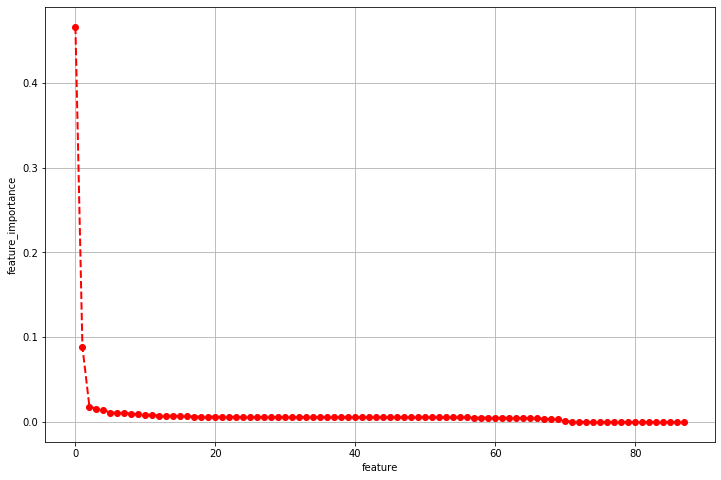

In [75]:
# choose cut_off for the importances
# take features with importances > cut_off

importances_sort = np.sort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.plot(np.arange(len(importances)), importances_sort, 'ro--', linewidth=2)
plt.xlabel('feature')
plt.ylabel('feature_importance')
plt.grid()
plt.show()

In [87]:
# take the first x features sorted by the importance
num_features = 69

features_selected = df_imp.index[0:num_features].tolist()
features_selected

['I3MCWeightDict.OneWeight',
 'I3MCWeightDict.TotalInteractionProbabilityWeight',
 'SplineMPEDirectHitsD.dir_track_length',
 'SplineMPEDirectHitsICB.n_late_doms',
 'HitStatisticsValuesIC.q_tot_pulses',
 'Borderness.Q_ratio_in_border',
 'SplineMPETruncatedEnergy_SPICEMie_DOMS_Muon.energy',
 'SplineMPETruncatedEnergy_SPICEMie_BINS_MuEres.value',
 'SplineMPEMuEXDifferential.energy',
 'SplineMPEDirectHitsICE.n_dir_doms',
 'SplineMPE_MillipedeHighEnergyMIEFitParams.rlogl',
 'BestTrackCramerRaoParams.cramer_rao_theta',
 'SPEFit2GeoSplit1BayesianFitParams.logl',
 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_dEdX.value',
 'SplineMPETruncatedEnergy_SPICEMie_DOMS_Neutrino.energy',
 'SPEFit2TimeSplit1FitParams.logl',
 'SplineMPE.zenith',
 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Neutrino.energy',
 'LineFitTimeSplit2.speed',
 'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.energy',
 'SplineMPETruncatedEnergy_SPICEMie_AllBINS_Neutrino.energy',
 'BestTrackCramerRaoParams.variance_theta',
 'SPEFit2Ba

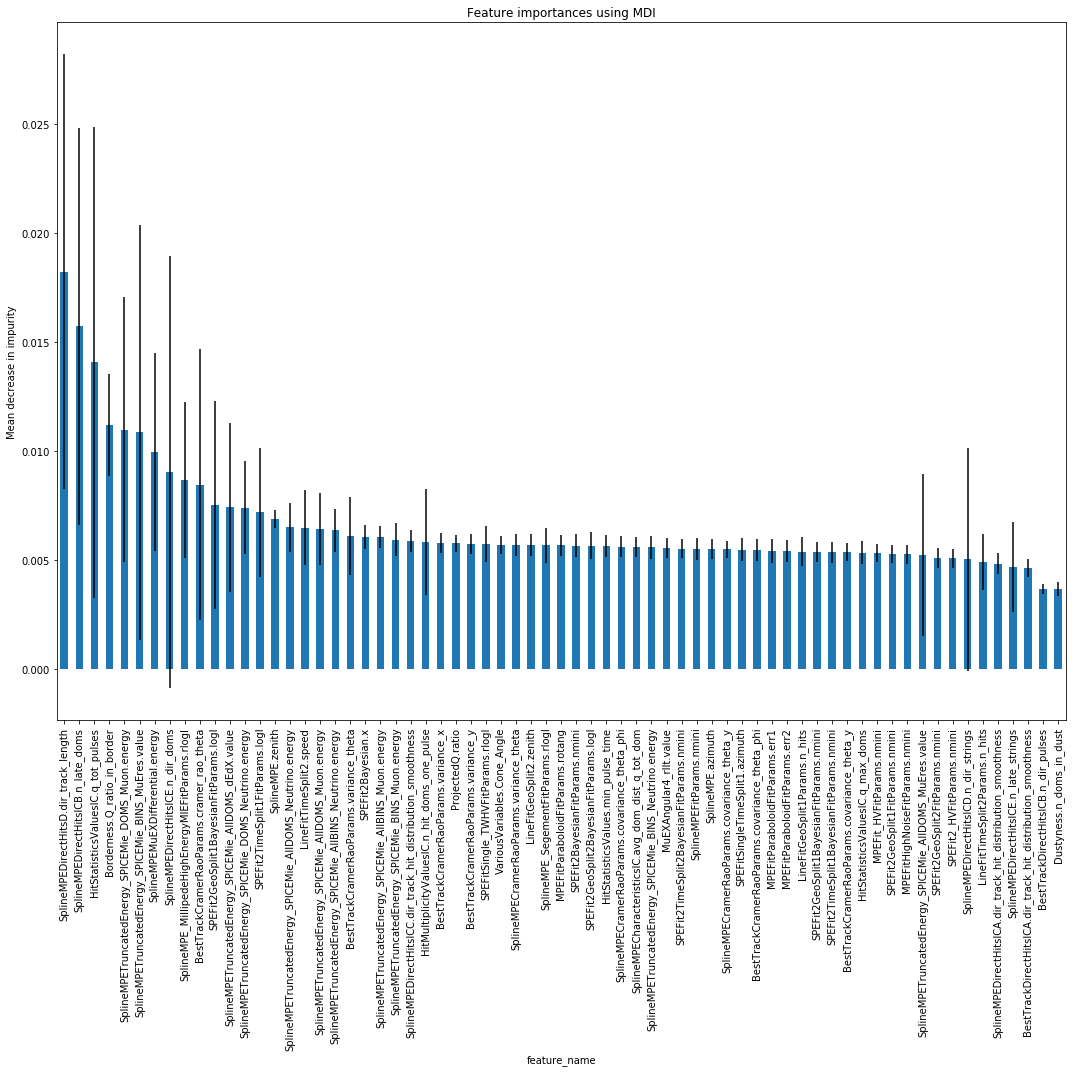

In [89]:
# probably the first 2 features are MC 

forest_importances = df_imp['feature_importance'][2:num_features] #, 

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

forest_importances.plot.bar(yerr=df_imp['std'][2:num_features], ax=ax) # index=features_selected
ax.set_title("Feature importances using MDI") # mean decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('output/feature_importance.pdf')